In [1]:
import os
import json
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns
from colorama import Fore
from sklearn.linear_model import LinearRegression

In [3]:
csv_list = glob('./*/*/*.csv')
csv_list

['.\\dataset\\Cheapest Electric Cars\\Cheapestelectriccars-EVDatabase.csv',
 '.\\dataset\\Electric & Alternative Fuel Vehicles US [2022]\\Alternative Fuel Vehicles US.csv',
 '.\\dataset\\Electric & Alternative Fuel Vehicles US [2022]\\Light Duty Vehicles.csv',
 '.\\dataset\\Electric & Alternative Fuel Vehicles US [2022]\\Medium and Heavy Duty Vehicles.csv',
 '.\\dataset\\Electric Vehicle Charging Stations\\ev_stations_v1.csv',
 '.\\dataset\\Electric Vehicles\\evdataset.csv',
 '.\\dataset\\Electric Vehicles - India\\EVIndia.csv',
 '.\\dataset\\Electric Vehicles Registered in Washington State\\Electric_Vehicle_Population_Data.csv',
 '.\\dataset\\Electric Vehicles User Reviews India\\2-wheeler-EV-bikewale.csv',
 '.\\dataset\\Electric Vehicles User Reviews India\\4-wheeler-EV-cardekho.csv',
 '.\\dataset\\Electric Vehicles User Reviews India\\4-wheeler-EV-carwale.csv',
 '.\\dataset\\EVPopulation\\Electric_Vehicle_Population_Data (1).csv',
 '.\\dataset\\EVPopulation\\Electric_Vehicle_Populat

In [115]:
j = {'csv_list':csv_list}
with open('csv_list.json', 'w') as f:
    json.dump(j, f, indent=4)

In [4]:
len(csv_list)

16

## df1

In [5]:
df1 = pd.read_csv(csv_list[0])
os.path.basename(csv_list[0])

'Cheapestelectriccars-EVDatabase.csv'

In [6]:
df1.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,PriceinGermany,PriceinUK
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [7]:
df1['kWh'] = df1.Subtitle.str.findall('[\d\.]+')
df1['kWh'] = df1['kWh'].apply(lambda x: x[0])
df1['kWh'] = df1['kWh'].astype('float')

In [8]:
df1.drop('Subtitle', axis=1, inplace=True)

In [9]:
df1.Acceleration = df1.Acceleration.str.findall('[\d\.]+').apply(lambda x: x[0]).astype('float')

In [10]:
df1.TopSpeed = df1.TopSpeed.str.findall('[\d]+').apply(lambda x: int(x[0]))

In [11]:
df1.Range = df1.Range.str.findall('[\d]+').apply(lambda x: int(x[0]))

In [12]:
df1.Efficiency = df1.Efficiency.str.findall('[\d]+').apply(lambda x: int(x[0]))

In [13]:
def func(x):
    if x:
        return int(x[0])
    else:
        return np.nan

df1.FastChargeSpeed = df1.FastChargeSpeed.str.findall('[\d]+').apply(func)
df1.FastChargeSpeed = df1.FastChargeSpeed.fillna(df1.FastChargeSpeed.median())

In [14]:
def func1(x):
    if isinstance(x, float):
        return x
    elif x:
        return int(x[0])
    else:
        return np.nan

df1.PriceinGermany = df1.PriceinGermany.str.replace(',', '').str.findall('[\d]+').apply(func1)
df1.PriceinGermany = df1.PriceinGermany.fillna(df1.PriceinGermany.median())

In [15]:
def func1(x):
    if isinstance(x, float):
        return x
    elif x:
        return int(x[0])
    else:
        return np.nan

df1.PriceinUK = df1.PriceinUK.str.replace(',', '').str.findall('[\d]+').apply(func1)
df1.PriceinUK = df1.PriceinUK.fillna(df1.PriceinUK.median())

In [16]:
df1['Price'] = (df1.PriceinGermany + df1.PriceinUK) / 2

In [17]:
df1.columns = ['Name', 'Acceleration (s)', 'TopSpeed (km/h)', 'Range (km)', 'Efficiency (Wh/km)',
       'FastChargeSpeed (km/h)', 'Drive', 'NumberofSeats', 'PriceinGermany (€)',
       'PriceinUK (€)', 'kWh', 'Price (€)']

In [18]:
df1.head()

,Name,Acceleration (s),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (€),PriceinUK (€),kWh,Price (€)
0,Opel Ampera-e,7.3,150,335,173,210.0,Front Wheel Drive,5,42990.0,45000.0,58.0,43995.00
1,Renault Kangoo Maxi ZE 33,22.4,130,160,194,430.0,Front Wheel Drive,5,50647.5,31680.0,31.0,41163.75
2,Nissan Leaf,7.9,144,220,164,230.0,Front Wheel Drive,5,29990.0,25995.0,36.0,27992.50
3,Audi e-tron Sportback 55 quattro,5.7,200,375,231,600.0,All Wheel Drive,5,50647.5,79900.0,86.5,65273.75
4,Porsche Taycan Turbo S,2.8,260,390,215,860.0,All Wheel Drive,4,186336.0,138830.0,83.7,162583.00


In [19]:
df1.groupby('Drive').mean()

,Acceleration (s),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),NumberofSeats,PriceinGermany (€),PriceinUK (€),kWh,Price (€)
Drive,,,,,,,,,,
All Wheel Drive,4.882812,213.968750,421.406250,202.125000,649.375000,5.046875,82693.296875,71274.031250,84.343750,76983.664062
Front Wheel Drive,10.371831,145.676056,261.971831,196.591549,298.873239,5.563380,43904.204225,38602.323944,50.857746,41253.264085
Rear Wheel Drive,8.108889,171.444444,336.888889,179.444444,524.222222,4.711111,45868.122222,41720.200000,60.857778,43794.161111


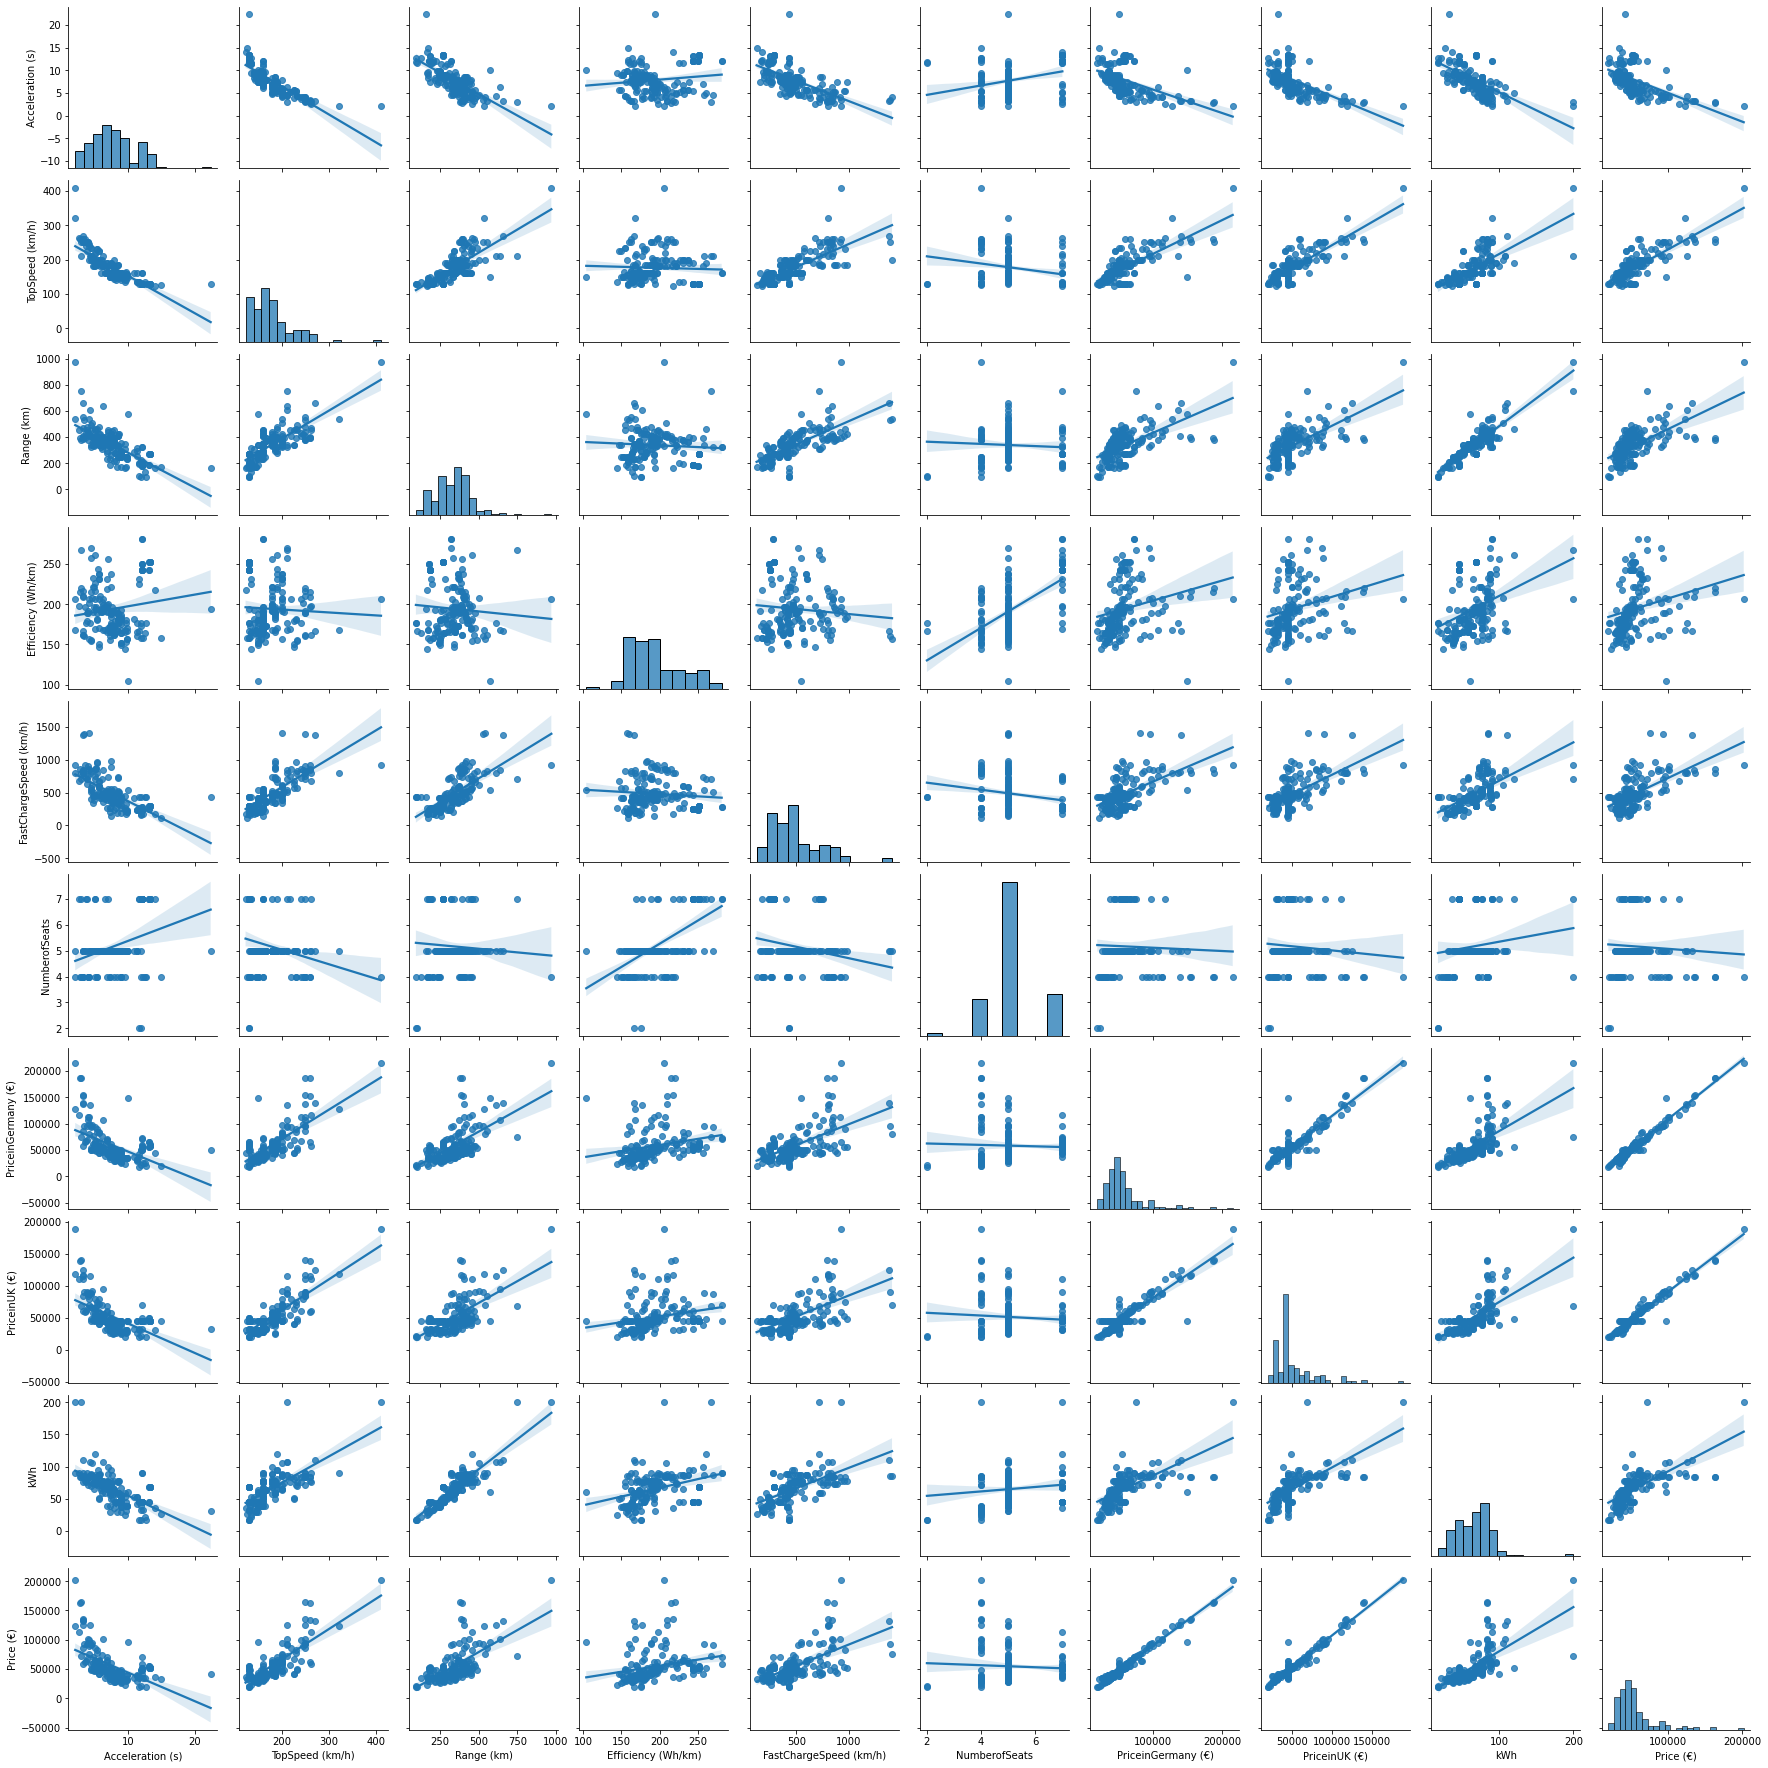

In [21]:
sns.pairplot(df1, kind='reg');

In [22]:
df1.head(3)

,Name,Acceleration (s),TopSpeed (km/h),Range (km),Efficiency (Wh/km),FastChargeSpeed (km/h),Drive,NumberofSeats,PriceinGermany (€),PriceinUK (€),kWh,Price (€)
0,Opel Ampera-e,7.3,150,335,173,210.0,Front Wheel Drive,5,42990.0,45000.0,58.0,43995.00
1,Renault Kangoo Maxi ZE 33,22.4,130,160,194,430.0,Front Wheel Drive,5,50647.5,31680.0,31.0,41163.75
2,Nissan Leaf,7.9,144,220,164,230.0,Front Wheel Drive,5,29990.0,25995.0,36.0,27992.50


In [23]:
df1.columns

Index(['Name', 'Acceleration (s)', 'TopSpeed (km/h)', 'Range (km)',
       'Efficiency (Wh/km)', 'FastChargeSpeed (km/h)', 'Drive',
       'NumberofSeats', 'PriceinGermany (€)', 'PriceinUK (€)', 'kWh',
       'Price (€)'],
      dtype='object')

In [24]:
x = df1[['Acceleration (s)', 'TopSpeed (km/h)', 'Range (km)',
       'Efficiency (Wh/km)', 'FastChargeSpeed (km/h)', 'Drive',
       'NumberofSeats', 'kWh']]

In [25]:
y = df1['Price (€)']

In [27]:
x.Drive.unique()

array(['Front Wheel Drive', 'All Wheel Drive', 'Rear Wheel Drive'],
      dtype=object)

In [29]:
x.Drive = x.Drive.map({'Front Wheel Drive':1, 'All Wheel Drive':3, 'Rear Wheel Drive':2})

C:\Users\ADHIBAN SIDDHARTH V\AppData\Local\Temp\ipykernel_5804\1361191320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.Drive = x.Drive.map({'Front Wheel Drive':1, 'All Wheel Drive':3, 'Rear Wheel Drive':2})


In [34]:
lin_model = LinearRegression()
lin_model.fit(x, y)

LinearRegression()

In [39]:
sheet = []
for i, j in zip(lin_model.coef_, x.columns):
    sheet.append([j, round(i, 2)])
sheet.append(['intercept', round(lin_model.intercept_, 2)])

In [44]:
pd.DataFrame(sheet, columns=['columns', 'values']).sort_values('values', ascending=False).reset_index(drop=True)

,columns,values
0,Acceleration (s),1746.64
1,Efficiency (Wh/km),788.98
2,TopSpeed (km/h),514.96
3,Range (km),311.02
4,FastChargeSpeed (km/h),-0.87
5,kWh,-1320.42
6,Drive,-1640.71
7,NumberofSeats,-7348.22
8,intercept,-180397.20


## df2

In [55]:
df2 = pd.read_csv(csv_list[1])
os.path.basename(csv_list[1])

'Alternative Fuel Vehicles US.csv'

In [46]:
df2.shape

(882, 22)

In [48]:
pd.options.display.max_columns = 22

In [49]:
df2.head()

,Category,Model,Model Year,Manufacturer,Fuel,All-Electric Range,PHEV Total Range,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Transmission Make,Engine Type,Engine Size,Engine Cylinder Count,Number of Passengers,Heavy-Duty Power System,Notes,Drivetrain
0,Sedan/Wagon,NSX,2022.0,Acura,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,21.0,22.0,21.0,Auto,NaN,SI,3.5L,6.0,NaN,NaN,NaN,AWD
1,Sedan/Wagon,A3,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,29.0,38.0,32.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,FWD
2,Sedan/Wagon,A3 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,28.0,36.0,31.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
3,Sedan/Wagon,A4 allroad quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,24.0,30.0,26.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD
4,Sedan/Wagon,A4 quattro,2022.0,Audi,Hybrid Electric,NaN,NaN,NaN,NaN,NaN,26.0,34.0,29.0,Auto,NaN,SI,2.0L,4.0,NaN,NaN,NaN,AWD


In [72]:
def nunique(df2, n):
    for i in df2.columns:
        print(f'{Fore.RED}{i}: {Fore.GREEN}{df2[i].nunique()}, {Fore.MAGENTA}percent: {Fore.BLUE}{df2[i].nunique() * 100 / n:.2f}%')

nunique(df2, 882)

Category: 15, percent: 1.70%
Model: 633, percent: 71.77%
Model Year: 2, percent: 0.23%
Manufacturer: 81, percent: 9.18%
Fuel: 22, percent: 2.49%
All-Electric Range: 110, percent: 12.47%
PHEV Total Range: 25, percent: 2.83%
Alternative Fuel Economy City: 68, percent: 7.71%
Alternative Fuel Economy Highway: 66, percent: 7.48%
Alternative Fuel Economy Combined: 88, percent: 9.98%
Conventional Fuel Economy City: 43, percent: 4.88%
Conventional Fuel Economy Highway: 40, percent: 4.54%
Conventional Fuel Economy Combined: 40, percent: 4.54%
Transmission Type: 4, percent: 0.45%
Transmission Make: 32, percent: 3.63%
Engine Type: 4, percent: 0.45%
Engine Size: 92, percent: 10.43%
Engine Cylinder Count: 4, percent: 0.45%
Number of Passengers: 52, percent: 5.90%
Heavy-Duty Power System: 84, percent: 9.52%
Notes: 128, percent: 14.51%
Drivetrain: 5, percent: 0.57%


## df3

In [64]:
df3 = pd.read_csv(csv_list[2])
os.path.basename(csv_list[2])

'Light Duty Vehicles.csv'

In [65]:
df3.shape

(3008, 29)

In [67]:
pd.options.display.max_columns = 29

In [68]:
df3.head()

,Vehicle ID,Fuel ID,Fuel Configuration ID,Manufacturer ID,Category ID,Model,Model Year,Alternative Fuel Economy City,Alternative Fuel Economy Highway,Alternative Fuel Economy Combined,Conventional Fuel Economy City,Conventional Fuel Economy Highway,Conventional Fuel Economy Combined,Transmission Type,Engine Type,Engine Size,Engine Cylinder Count,Engine Description,Manufacturer,Manufacturer URL,Category,Fuel Code,Fuel,Fuel Configuration Name,Electric-Only Range,PHEV Total Range,PHEV Type,Notes,Drivetrain
0,13044,45,9.0,365,27,NSX,2022,NaN,NaN,NaN,21.0,22.0,21.0,Auto,SI,3.5L,6.0,3.5L V6,Acura,http://www.acura.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
1,12854,45,9.0,377,27,A3,2022,NaN,NaN,NaN,29.0,38.0,32.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,FWD
2,12842,45,9.0,377,27,A3 quattro,2022,NaN,NaN,NaN,28.0,36.0,31.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
3,12783,45,9.0,377,27,A4 allroad quattro,2022,NaN,NaN,NaN,24.0,30.0,26.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD
4,12782,45,9.0,377,27,A4 quattro,2022,NaN,NaN,NaN,26.0,34.0,29.0,Auto,SI,2.0L,4.0,2.0L I4,Audi,http://progress.audiusa.com/,Sedan/Wagon,HYBR,Hybrid Electric,Hybrid Electric,NaN,NaN,NaN,NaN,AWD


In [73]:
nunique(df3, 3008)

Vehicle ID: 3008, percent: 100.00%
Fuel ID: 11, percent: 0.37%
Fuel Configuration ID: 5, percent: 0.17%
Manufacturer ID: 55, percent: 1.83%
Category ID: 6, percent: 0.20%
Model: 1287, percent: 42.79%
Model Year: 32, percent: 1.06%
Alternative Fuel Economy City: 138, percent: 4.59%
Alternative Fuel Economy Highway: 116, percent: 3.86%
Alternative Fuel Economy Combined: 96, percent: 3.19%
Conventional Fuel Economy City: 54, percent: 1.80%
Conventional Fuel Economy Highway: 52, percent: 1.73%
Conventional Fuel Economy Combined: 41, percent: 1.36%
Transmission Type: 64, percent: 2.13%
Engine Type: 115, percent: 3.82%
Engine Size: 256, percent: 8.51%
Engine Cylinder Count: 8, percent: 0.27%
Engine Description: 356, percent: 11.84%
Manufacturer: 55, percent: 1.83%
Manufacturer URL: 42, percent: 1.40%
Category: 6, percent: 0.20%
Fuel Code: 11, percent: 0.37%
Fuel: 11, percent: 0.37%
Fuel Configuration Name: 5, percent: 0.17%
Electric-Only Range: 144, percent: 4.79%
PHEV Total Range: 25, perce

## df4

In [74]:
df4 = pd.read_csv(csv_list[3])
os.path.basename(csv_list[3])

'Medium and Heavy Duty Vehicles.csv'

In [75]:
df4.shape

(290, 9)

In [76]:
df4.head()

,Vehicle ID,Model,Manufacturer,Transmission Make,Num Passengers,Power System Ids,Fuels,Application Categories,Transmission Types
0,10941,ACMD-Xpert,Autocar,Allison,NaN,[10013],CNG - Compressed Natural Gas|LNG - Liquified N...,Street Sweeper,NaN
1,10773,ACMD-Xpert,Autocar,Allison,NaN,[10013],CNG - Compressed Natural Gas|LNG - Liquified N...,Vocational/Cab Chassis,NaN
2,11099,ACMD-Xpert,Autocar,Allison,NaN,[10013],CNG - Compressed Natural Gas|LNG - Liquified N...,Refuse,NaN
3,11209,ACTT Terminal Tractor,Autocar,Vorza,NaN,[10562],Electric,Tractor,Automatic
4,11208,ACTT Terminal Tractor,Autocar,Allison,NaN,[10505],CNG - Compressed Natural Gas|LNG - Liquified N...,Tractor,NaN


In [94]:
df4.query("Fuels == 'Electric'")['Manufacturer'].value_counts()[:10]

Ford                        18
BYD                         17
GreenPower Motor Company    10
Lion Electric                8
Blue Bird                    6
Hometown Manufacturing       6
Proterra                     5
Peterbilt                    4
Starcraft                    3
COBUS Industries             3
Name: Manufacturer, dtype: int64

In [102]:
df4[df4['Application Categories'] == 'School Bus']['Fuels'].value_counts()

Electric                                15
Propane                                  3
CNG - Compressed Natural Gas             2
CNG - Compressed Natural Gas|Propane     1
Name: Fuels, dtype: int64